In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [70]:
data = np.load('em_sim.npy')
data = data.T

time_vec = np.linspace(0, 1000, int((1000)/0.01))

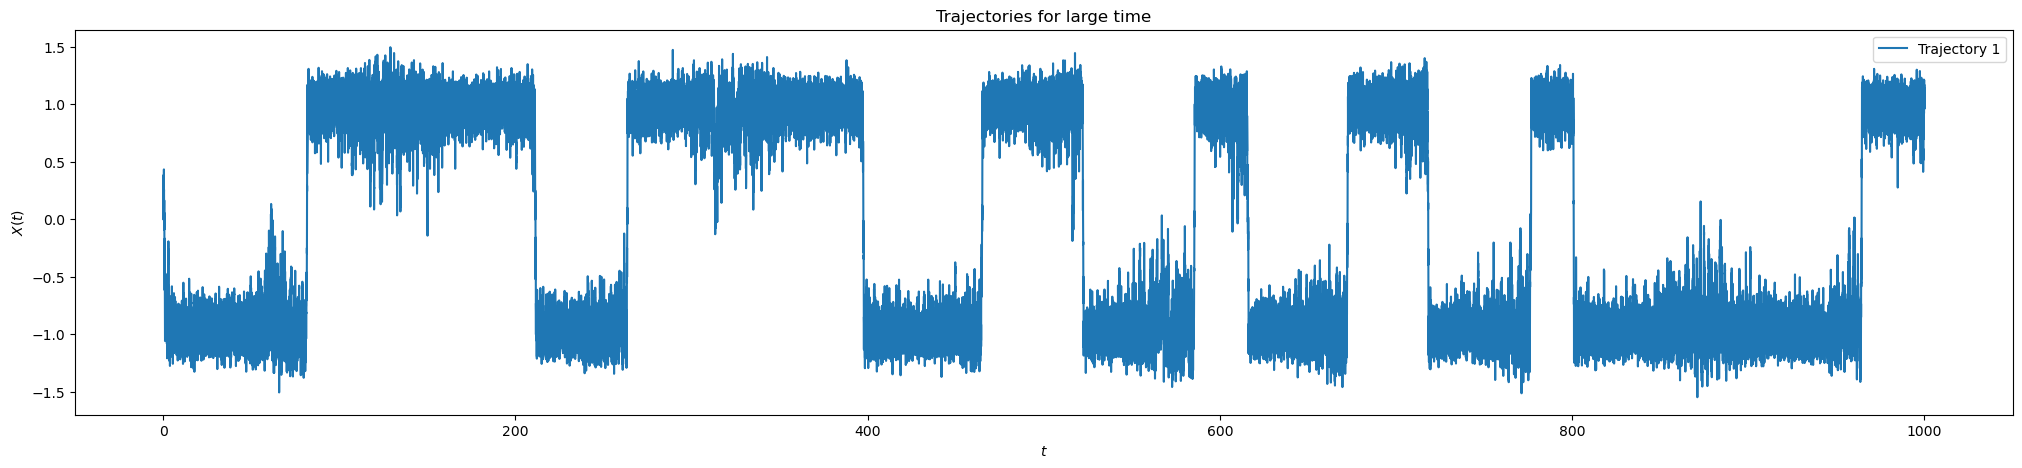

In [71]:
figure = plt.figure(figsize=(25, 5))
trajectory_plots = 1
for i in range(trajectory_plots):
    plt.plot(time_vec, data[i], alpha=1.0/trajectory_plots, label=f"Trajectory {i+1}")

plt.legend()
plt.title('Trajectories for large time')
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.show()

In [72]:
all_interval_lengths = []
all_interval_values  = []
trajectory_number    = []
all_arg_tracked      = []

for i in tqdm(range(len(data))):
    d1 = data[i]
    neg_well = d1 < 0
    arg_tracker = [0] + [j  for j in range(1, len(neg_well)) if neg_well[j] != neg_well[j - 1]] + [len(time_vec) - 1]

    all_arg_tracked.append(arg_tracker)

    for k in range(1, len(arg_tracker)):
        trajectory_number.append(i)
        prev_t = time_vec[arg_tracker[k - 1]]
        curr_t = time_vec[arg_tracker[k]]

        interval = (curr_t - prev_t)

        if d1[arg_tracker[k - 1]] >= 0:
            all_interval_lengths.append(interval)
            all_interval_values.append('positive')
        else:
            all_interval_lengths.append(interval)
            all_interval_values.append('negative')

100%|██████████| 5/5 [00:00<00:00, 14.74it/s]


In [73]:
data_builder = {'trajectory': trajectory_number,
                'interval_length': all_interval_lengths,
                'interval_value': all_interval_values}

df = pd.DataFrame(data=data_builder)
df

,trajectory,interval_length,interval_value
0,0,0.570006,positive
1,0,0.070001,negative
2,0,0.050001,positive
3,0,0.010000,negative
4,0,0.020000,positive
...,...,...,...
470,4,58.500585,positive
471,4,48.650487,negative
472,4,0.030000,positive
473,4,0.020000,negative


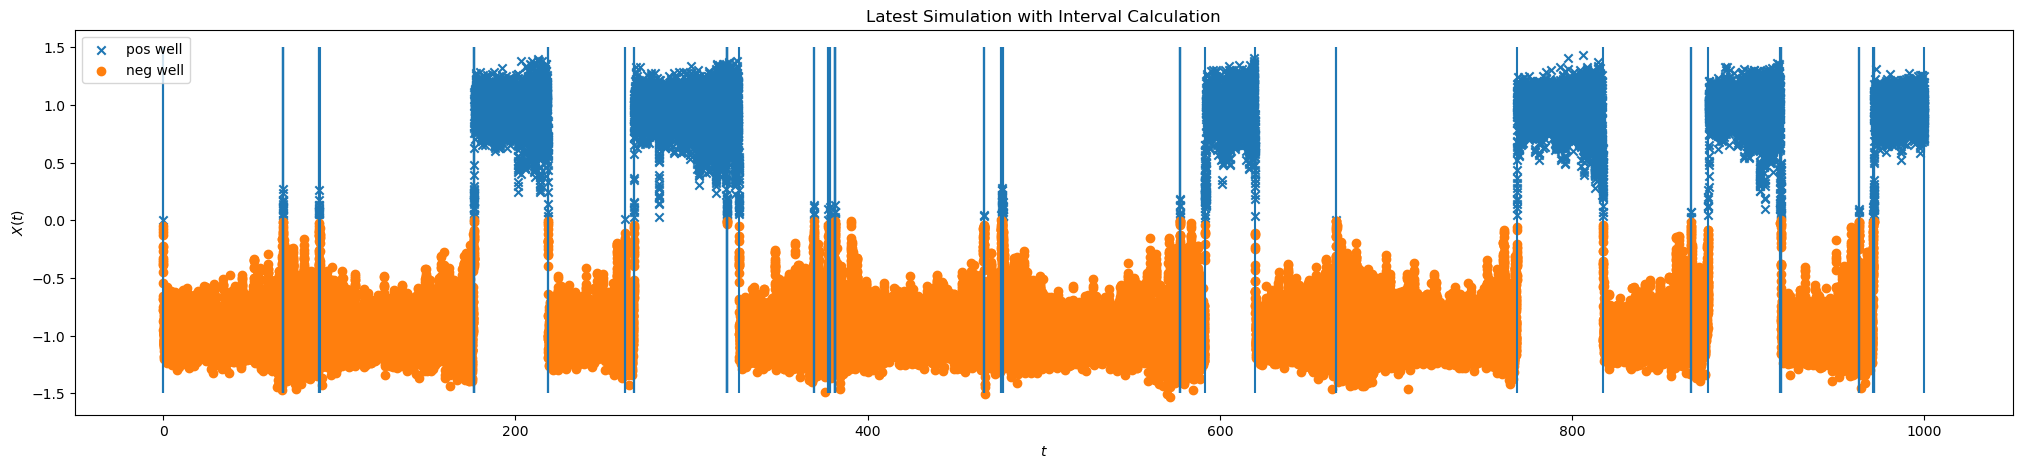

In [74]:
iter = 2
d1 = data[iter]
figure = plt.figure(figsize=(25, 5))
plt.scatter(time_vec[d1 >=0], d1[d1 >=0], label = 'pos well', marker='x')
plt.scatter(time_vec[d1 <0], d1[d1 <0], label = 'neg well')
plt.vlines(x=time_vec[all_arg_tracked[iter]], ymin=-1.5, ymax=1.5)
plt.title('Latest Simulation with Interval Calculation')
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.legend()
plt.show()

In [52]:
df.to_pickle('results/intervals.pkl')

In [83]:
trial = pd.read_pickle('results/pos.pkl')

In [84]:
trial[trial['trajectory'] <= 2]

,trajectory,interval_length,interval_value
0,0,0.010000,positive
1,0,0.010000,negative
2,0,0.020000,positive
3,0,0.170002,negative
4,0,0.010000,positive
5,0,0.830008,negative
6,0,0.060001,positive
7,0,0.010000,negative
8,0,998.879989,positive
9,1,0.010000,positive
